# Recommendation of Personalized Projects to Users in GitHub

            Fan Chen      1004047514        fanpeter.chen@mail.utoronto.ca

# 1. Goal of Project

Nowaday, personalized recommendation is very popular in retails and services. For open source community, it is also interesting to recommend appropriate projects to the users to activate their interest and improve their experience in the community. The purpose of my research is to build a recommendation system in GitHub to match projects and users based on historic behaviors data.

## 1.1 Paper content

The Paper I am going to reproduce is "Machine learning-based product recommendation using Apache Spark," 2017, IEEE SmartWorld.

In Lin’s study, they developed a product recommender system using Apache Spark and its ALS algorithm. 

#### What I reproduce from the paper

Lin applied the Alternating Least Squares (ALS) matrix factorization method, which is an advanced version of collaborative filtering method. They utilized Amazon book reviews and product review metadata to train the recommendation model and used root mean squared error (RMSE) to evaluate the model performance. For this part, I am going to reproduce it. I will apply the mathodology of data preprocessing(inculding rating, join, merge the item information) and algorithm of ALS method of pyspark in my recommendation system. Also, I will use the same evaluation matrix(RMSE) of this paper, and compare the precision and recall in my work. 

#### What I won't reproduce from the paper

In lin's work, she also introduce the utilization of AWS and compare the running time on different spark instances. The result showes the number of memory cores have a obvious affect on the running time. I won't reproduce this part because my pyspark environment is my local computer, but this part will be very helpful if further scalable plan of recommendation system is going to be implemented in the future. 

## 1.1 Schedule

### 1.1.1 Literature review (One week  6 hours)
#### Plan:
In this step, the most important is to collect good qualities of paper, which allows me to reproduce the analytics methodology in github dataset based on pyspark platform. I am going to collect 20 papers, from which I will use pick up 5 papers to read carefully. 

#### Actuality:
I collected 20 papers, covering from github analytics and state of the art recommendation systems papers from google scholars. It took one and a half week due to topic change from social network analysis to recommendation system. Finally, I picked this paper to reproduce.


### 1.1.2  Data collections (One week  5 hours)

#### Plan
In this step, I am going to collect the data from Github API. In Github API, the data are very diverse and I can collect both the dataset of repositiries and users as a good feature in my rencommendation system. I am going to collect 40,000 repositories and then collect users information based on that.

#### Acutality
The result showes, I collected more than 60,000 repositories and it take more than one and half week due to the rate limitation of Github API. 

### 1.1.3  Data preprocessing (One week  5 hours)

#### Plan
In this step, I should clean and preselect the data based on the popularity of repositories and the acitivities of the users. To make sure the recomendation system can make a correct prediction, cold start problem need to be avoid during the preselection. Then we need to generate the rating score for RS based on the activities. 

#### Acutality
I did cleaning and preselection after data exploration analysis. It's very helpful to improve the peformance of the model. Also, after explode the activities list and generated rating score, I found the rating scores are very unbalanced. Therefore, undersampling is necessary to implement.


### 1.1.4 Modelling and Evaluation(One week  4 hours)

#### Plan
In this step, I will build ALS recommendation system model by pyspark.ml. Then I will do hyper-perameter tunings after I have the baseline model. Also, code language of users and repositories are important in recommendation system. The prediction will be further adjusted by the feature of language .
#### Acutality
In the beginning, I tried to train the model by fake data(MovieLen) to make sure the solution is doable in pyspark frame. Then I further put part of my github data into the model. RMSE is 0.4. The result seems feasible. Hyper-paramter tunings will be further implemented in this weekend.


# 2. Data Collection  

We collected data from GitHub API. My data for recommendation system should contain the information of users and repos. I found the repos have a list of contributors, stargazers, subscribers and onwer. Through these list, we can know the relationship between repos and users. From I decided to firstly scrap the data of repos. Then based on the user lists of repo, we can expand the list to generate the expected database.

There are only 1500000 Repos that were modified since 2018 and have > 1 fork. We don't need to such a large amount of data. So we focus on the repos that were modified since 2019 and have >1 fork. We found the repo's pushing hours are concentrated from 7am to 23 pm. So we random search the repos whose latest pushing data is after 2019 and betwwen 7 am to 23 pm.  

It took us one week to collect the data because of the limitation of Github API. The data include the information of 204637 users and 42024 repos. 

In [87]:
from github import Github, GithubException
import numpy as np
import pandas as pd
from pyspark.sql import *
import pyspark.sql.functions as F
import  datetime
import io,json
import datetime
import random
%matplotlib inline
import findspark
import pyspark
# sc = pyspark.SparkContext(appName="myAppName")
# spark = pyspark.sql.SQLContext(sc)

## Function 1: Peter's sleep code 

In [1]:
# delay function to solve the rate limitation of github API.
import datetime
import sched, time
s = sched.scheduler(time.time, time.sleep)
def print_time(a='default'):
    print("Restart to collect now")
def print_some_times():
    b=time.time()
    print("Exceeded exception limited. Will restart in one hour")
    s.enter(1800, 1, print_time)
    s.run()

In [2]:
#Log in with username and password
g = Github(input("user"),input("password"))
#Select the repositories based on the last updated date
repos = g.search_repositories(query = "pushed:>2019-01-01T00:00:00+00:00 forks:>=1",sort="updated",order="asc")

In [3]:
#Loop over the repo in repos
#Convert dictionary to JSON file; store it as "repo.json"
start_time = datetime.datetime.now()
with io.open('user_fan'+str(random.randint(1,20000))+'.json','w') as outfile:
    #Start the 10 iterations with 1000 repos pulled in each iteration
    for iteration in range(1):
        count_users = 0
        print("Iteration" + str(iteration+1) + ":")
        #While the repo does not reach 1000
        while(count_users<len(contributor_list)):

            if count_users % 1000 == 0:
                print("users " + str(count_users) + " for iteration " + str(iteration+1) + ":")
            try:
                user = g.get_user(contributor_list.iloc[count_users,0])
                #Keep track of number of repos
                #Iterate through each user in contributor_list
                count_users = count_users+1


            #Retireve important features for each user
            #Create a dictionary to store all the feature values
                dic = {}
                dic["login"] = user.login
                dic["id"] = user.id
                dic["repos_url"] = user.repos_url
                dic["created_at"] = user.created_at
                dic["updated_at"] = user.updated_at
                dic["followers"] = user.followers
                dic["following"] = user.following
                dic["public_repos"] = user.public_repos
                dic["public_gists"] = user.public_gists
                dic["type"] = user.type

                #Write the instance into JSON file
                outfile.write(json.dumps(dic, default = myconverter))
                outfile.write('\n')    
            except GithubException as e:
                if("API rate limit" in e.data["message"]):
                    print(e)
                    print_some_times()
                pass
print(datetime.datetime.now() - start_time)

We collected data from GitHub API. It took us one week to collect the data because of the limitation of Github API. The data include the information of 204637 users and 42024 repos. 

In [88]:
import findspark
import pyspark
# sc = pyspark.SparkContext(appName="myAppName")
# spark = pyspark.sql.SQLContext(sc)
df1 = spark.read.format("parquet").option("header", "true").load("all_users/*.parquet")
df2 = spark.read.format("parquet").option("header", "true").load("all_repos/*.parquet")
df1.createOrReplaceTempView("users")
df2.createOrReplaceTempView("repos")

In [55]:
df1.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- followers: long (nullable = true)
 |-- following: long (nullable = true)
 |-- id: long (nullable = true)
 |-- login: string (nullable = true)
 |-- public_gists: long (nullable = true)
 |-- public_repos: long (nullable = true)
 |-- repos_url: string (nullable = true)
 |-- type: string (nullable = true)
 |-- updated_at: string (nullable = true)



In [56]:
df2.printSchema()
# Data of Repos

root
 |-- repo_id: long (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- create_date: timestamp (nullable = true)
 |-- last_pushed_at: timestamp (nullable = true)
 |-- contributor_list: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- comments_count: integer (nullable = true)
 |-- commits_count: integer (nullable = true)
 |-- forks_count: integer (nullable = true)
 |-- size: integer (nullable = true)
 |-- open_issues: integer (nullable = true)
 |-- watchers_count: integer (nullable = true)
 |-- stars: integer (nullable = true)
 |-- network_count: integer (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- has_wiki: boolean (nullable = true)
 |-- has_projects: boolean (nullable = true)
 |-- has_issues: boolean (nullable = true)
 |-- has_downloads: boolean (nullable = true)



From the github behaviors, we can know there are four levels of interest the users have in repos: Create, contribute, subscribe and star. "Create" means the user own the repo, which showes the highest level of interest. "Contribute" means the user contribute to the repo and belongs to one part of the repo. "Subscribe" means the the user bookmark the the repo and will get the notification of issues and updation. "star" means the user bookmark the repo but won't receive the notification. So we assign different points to the the levels: Create - 4, Contribute - 3, Subscribe - 2, Star - 1, none - 0. 


#### code to get additional data:

In [ ]:
owner = repo.owner.login
stargazers = repo.get_stargazers()
subscribers = repo.get_subscribers()

## 3. Data Preprocessing & Data Explorative Analysis

In the papers, the author uses the dataset of MovieLens. It's a clean and formatted table and this is what we expect to get from Github dataset. 

In [32]:
df_sample = spark.read.format("csv").option("header", "true").load("ml-latest-small/ratings.csv")
df_sample.show(2)

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
+------+-------+------+---------+
only showing top 2 rows



In [11]:
df_sample.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)



### 3.1 Table joint

To get the rating table like above, first I need to join the user table and repo table. Since contribution list, watcher list and subscribtion list are nested list in the json table. After join, explode operation is necessary to manipulate.

In [ ]:
#load all of the repos data, df1 is contribution list, df2 contains owner, stargazers and subscribers.
df1 = spark.read.format("parquet").option("header", "true").load("all_repos/*.parquet")
df2 = spark.read.format("json").option("header", "true").load("repo/*.json")
df1.createOrReplaceTempView("repos1")
df2.createOrReplaceTempView("repos2")

#### code to join table

In [120]:
df3=spark.sql("""
SELECT repo_id,contributor_list FROM repos
""")
df3.show()



+---------+--------------------+
|  repo_id|    contributor_list|
+---------+--------------------+
| 52453375|[VisionResearchBlog]|
| 33048276|[tj, ggilder, mar...|
| 89484400|[Vashnak, kasongo...|
|114363116|[appcypher, xeqlo...|
| 49871922|[milo, keithy, ma...|
| 47617976|[botdetect-suppor...|
|168845286|       [yanzhongxin]|
|137354331|[cola9, MihaelBra...|
| 36346737|[seonim-ryu, hg-c...|
|105284769|[jackfranklin, da...|
| 79986730|          [zacksiri]|
| 23377500|[vmalloc, boazin,...|
| 95911231|[azouaoui-med, we...|
|135040218|           [Amirufc]|
| 67251415|[lociii, MounirMe...|
|170280071|            [zapkub]|
| 40466469| [sparanoid, hjiang]|
|  8251614|[mikebell, PJnes,...|
| 43532887|[aoterodelaroza, ...|
| 41369154|        [stephank16]|
+---------+--------------------+
only showing top 20 rows



In [89]:
df3=spark.sql("""
SELECT t1.* FROM users
join
(SELECT repo_id,explode(contributor_list) as contri_user_name FROM repos) as t1
on contri_user_name = login
""")
df3.show()


+--------+------------------+
| repo_id|  contri_user_name|
+--------+------------------+
|52453375|VisionResearchBlog|
|33048276|                tj|
|33048276|           ggilder|
|33048276|         marcandre|
|33048276|             benbc|
|33048276|          fgalassi|
|33048276|        JonathonMA|
|33048276|        toolmantim|
|33048276|    JosephPecoraro|
|33048276|      mattbrictson|
|33048276|               rmc|
|33048276|           SkyTrix|
|33048276|            gogiel|
|33048276|          jrobeson|
|33048276|        rohitpaulk|
|33048276|            rrrene|
|33048276|          fallwith|
|33048276|       kethomassen|
|33048276|              suan|
|33048276|          andrewvc|
+--------+------------------+
only showing top 20 rows



### 3.2 User preselection of contributors

For the users who have little behavior data, we are going to drop them out. We only select the user who contributed, created, stared or subscibted more than 5 repos. It will improve the perfomance of the recommendation

#### code to filter users (only by contributors here):

In [103]:
spark.sql("""
SELECT user_name, count(1) from
(SELECT distinct repo_id,explode(contributor_list) as user_name FROM repos) as t1
group by user_name
having count(1)>5
""").show()

+--------------------+--------+
|           user_name|count(1)|
+--------------------+--------+
|              jiahao|       8|
|            cardosov|       6|
|             pdubroy|       6|
|               rthor|       6|
|          dwightjack|      15|
|          pabelanger|      25|
|              Xuanwo|       8|
|CyrilRoelandteNov...|       9|
|              aboe76|       8|
|              luisbg|       7|
|            bjrmatos|      13|
|      mikaelarguedas|      20|
|        rspieldenner|       7|
|            Matoking|      16|
|             jparise|       9|
|          DataTables|       7|
|             sorensp|       6|
|             sorpaas|       9|
|           hharrison|      15|
|          electrical|       9|
+--------------------+--------+
only showing top 20 rows



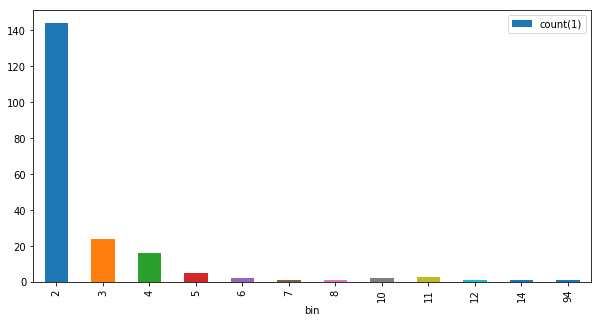

In [119]:
spark.sql("""
select bin,count(1) from
(
SELECT user_id, floor(count(1)/1) as bin from
(SELECT distinct repo_id, stargazers as user_id,int(4) as rate from repos2)t1
group by user_id
)
group by bin
having bin >1
and bin <17
order by bin
""").toPandas().plot(kind="bar", x="bin", y="count(1)", figsize=(10,5))

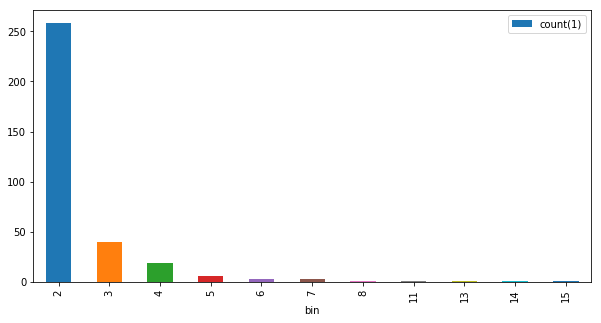

In [115]:
spark.sql("""
select bin,count(1) from
(
SELECT user_id, floor(count(1)/1) as bin from
(SELECT distinct repo_id, subscribers as user_id,int(4) as rate from repos2)t1
group by user_id
)
group by bin
having bin >1
and bin <17
order by bin
""").toPandas().plot(kind="bar", x="bin", y="count(1)", figsize=(10,5))

In [116]:
pand=spark.sql(""" select bin,count(1) from
(SELECT user_name, floor(count(1)/5) as bin from
(SELECT distinct repo_id,explode(contributor_list) as user_name FROM repos) as t1
group by user_name
) t2
group by bin
having bin<15
and bin >1
order by bin

""").toPandas()

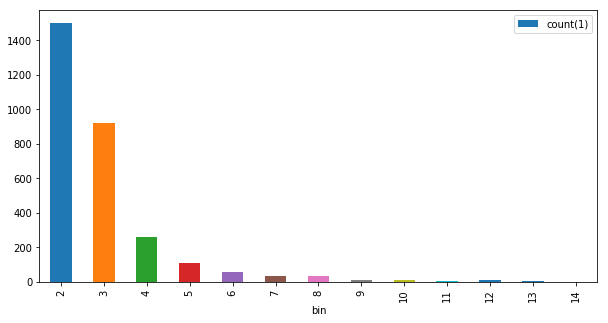

In [117]:
import matplotlib.pyplot as plt
pand.plot(kind="bar", x="bin", y="count(1)", figsize=(10,5))
plt.show()

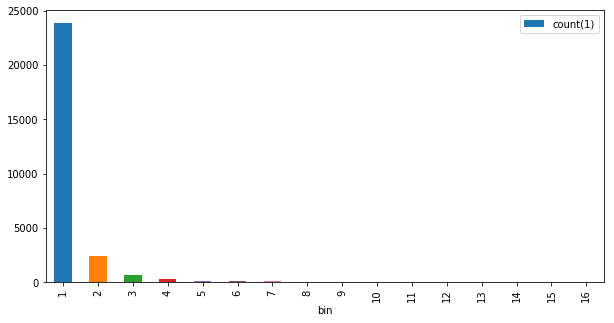

In [118]:
spark.sql("""
select bin,count(1) from
(
SELECT user_id, floor(count(1)/1) as bin from
(SELECT distinct repo_id, owner as user_id,int(4) as rate from repos2)t1
group by user_id
)
group by bin
having bin >0
and bin <17
order by bin
""").toPandas().plot(kind="bar", x="bin", y="count(1)", figsize=(10,5))

### 3.3 Rating Formulation

We need to formulate rating score based on our data. For each repo and user, we need to confirm their association. The rating score is calculated based on the schema we proposed above. A function of rating need to be created in this process and the running time should be long because of the number of records.

In [121]:
spark.sql("""
SELECT distinct repo_id,explode(contributor_list) as user_id,int(3) as rate from repos1
""").show()

+---------+----------------+----+
|  repo_id|         user_id|rate|
+---------+----------------+----+
| 21818302|        SomeFire|   3|
| 21633683|       saidobeid|   3|
| 38204589|greenkeeper[bot]|   3|
|156655568|          cnotin|   3|
|  1280658|          kevmoo|   3|
|   194858|       fbergroth|   3|
| 37996233| bhavishyagopesh|   3|
| 12393467|           msoos|   3|
|127482608|        mcollina|   3|
| 54207245|      matheuslao|   3|
|127199868|        jonashao|   3|
|127199868|         Vevlins|   3|
| 32794055|           endiz|   3|
| 78103207|    cdcharlebois|   3|
| 74883347|          ondrap|   3|
| 13994064|            vmax|   3|
|112221016|          ocpmax|   3|
| 60663791|        rockstar|   3|
|  7178155|       kabentley|   3|
|    10664|        litvinok|   3|
+---------+----------------+----+
only showing top 20 rows



In [123]:
# The function used to generate rating score based on the 4 levels behavior
# contributors's rating is 3
df_con=spark.sql("""
SELECT distinct repo_id,explode(contributor_list) as user_id,int(3) as rate from repos1
""")
# owner's rating is 4
df_owner=spark.sql("""
SELECT distinct repo_id, owner as user_id,int(4) as rate from repos2
""")
# stargazer's rating is 1
df_star=spark.sql("""
SELECT distinct repo_id, explode(stargazers) as user_id,int(1) as rate from repos2
""")
# stargazer's rating is 2
df_sub=spark.sql("""
SELECT distinct repo_id, explode(subscribers) as user_id,int(2) as rate from repos2
""")

In [128]:
spark.sql("""
SELECT user_id, repo_id, rate from combine_list
order by user_id,repo_id
""").show()

+-------------+---------+----+
|      user_id|  repo_id|rate|
+-------------+---------+----+
|            0|  1326806|   1|
|            0|  1326806|   3|
|       0----0|118226152|   3|
|       0--key|  3028781|   1|
|       0--key|  8357227|   1|
|       0--key| 23971425|   1|
|       0-0-0-| 44971752|   1|
|      0-0-0-0|  7377936|   3|
|0-0-0-0-0-0-0| 28904322|   1|
|  0-0Flash0-0|  3431193|   1|
|        0-1-0| 51716038|   1|
|        0-1-0| 73579984|   1|
|        0-1-0|107785146|   1|
|        0-1-0|140457254|   1|
|        0-10V|  2418744|   1|
|      0-Arise|  5133949|   1|
|    0-Captain|  2540368|   1|
|          0-F| 15639771|   1|
|          0-F| 37287172|   1|
|          0-F| 42456996|   1|
+-------------+---------+----+
only showing top 20 rows



In [125]:
df_new=df_owner.unionAll(df_con).unionAll(df_star).unionAll(df_sub)
df_new.createOrReplaceTempView("combine_list")
# If one users have several behaviors in one repos, choose the highest rating as the score
df_result=spark.sql("""
SELECT user_id, repo_id, max(rate) as rate from combine_list
group by user_id, repo_id
order by user_id,repo_id
""")
#df_result.write.parquet("rate_table.parquet")

### 3.4 Exploration & Selection

In [126]:
df_result.show()

+-------------+---------+----+
|      user_id|  repo_id|rate|
+-------------+---------+----+
|            0|  1326806|   3|
|       0----0|118226152|   3|
|       0--key|  3028781|   1|
|       0--key|  8357227|   1|
|       0--key| 23971425|   1|
|       0-0-0-| 44971752|   1|
|      0-0-0-0|  7377936|   3|
|0-0-0-0-0-0-0| 28904322|   1|
|  0-0Flash0-0|  3431193|   1|
|        0-1-0| 51716038|   1|
|        0-1-0| 73579984|   1|
|        0-1-0|107785146|   1|
|        0-1-0|140457254|   1|
|        0-10V|  2418744|   1|
|      0-Arise|  5133949|   1|
|    0-Captain|  2540368|   1|
|          0-F| 15639771|   1|
|          0-F| 37287172|   1|
|          0-F| 42456996|   1|
|     0-Hacker|   908607|   2|
+-------------+---------+----+
only showing top 20 rows



Now we need to generate unique user_id using rank() function because user_id has to be integer instead of string.

In [18]:
df_result.createOrReplaceTempView("rate_list")
df_result2=spark.sql("""
select b.user_id, rate_list.repo_id, rate_list.rate from rate_list
left join
(select distinct user_id as user, rank() over(order by user_id) as user_id
from combine_list) as b
on rate_list.user_id = b.user
""")

In [19]:
df_result2.show()

+-------+---------+----+
|user_id|  repo_id|rate|
+-------+---------+----+
|    447| 45512989|   2|
|    447| 33486016|   1|
|    773| 74221944|   2|
|   1532| 63188650|   1|
|   1532| 21872392|   1|
|   2611| 33486016|   1|
|   2632|128658421|   1|
|   2632|105306631|   1|
|   2632|  2006876|   1|
|   2632|  5239185|   1|
|   2632| 24878875|   1|
|   2632| 48610662|   1|
|   2632| 47716038|   1|
|   2632|  2476162|   1|
|   2632| 44416666|   1|
|   2632| 76221943|   1|
|   2632| 44296596|   1|
|   2632|161109499|   1|
|   2632| 35077713|   1|
|   2632| 12413949|   1|
+-------+---------+----+
only showing top 20 rows



To make sure our model has a good ability of prediction, we need to filter the user whose number of rating is less than 5. After filting, we can see the frequency distribution.

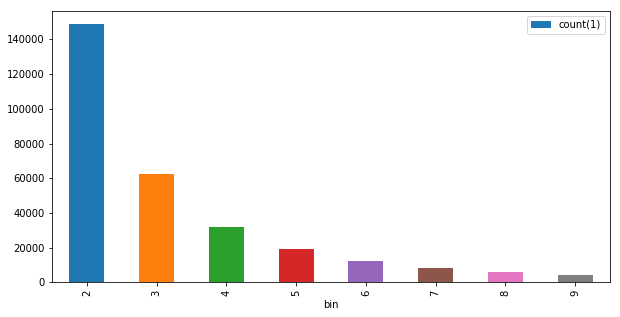

In [23]:
import matplotlib.pyplot as plt
df_result2.createOrReplaceTempView("rate_list2")
# select the users whose number of rating is greater than 5
df_result3=spark.sql("""
select user_id, count(1) as frequency from rate_list2
group by user_id
having frequency>5 
""")

spark.sql("""
select ceil(frequency/5) as bin, count(1)
from
(select user_id, count(1) as frequency from rate_list2
group by user_id
having frequency>5 
) b
group by ceil(frequency/5)
having bin<10
order by bin
""").toPandas().plot(kind="bar", x="bin", y="count(1)", figsize=(10,5))
plt.show()

Last graph showes that, 140000 users get involved with 5 to 10 repos. 

In [35]:
df_result3.createOrReplaceTempView("rate_list3")
#select the users whose number of rating is greater than 5
df_result4=spark.sql("""
select rate_list2.user_id, rate_list2.repo_id,rate_list2.rate 
from rate_list2, rate_list3
where rate_list2.user_id = rate_list3.user_id
""")

In [32]:
df_result4.show()

+-------+---------+----+
|user_id|  repo_id|rate|
+-------+---------+----+
|   8592| 15019962|   1|
|   8592|  9340574|   1|
|   8592| 25354393|   1|
|   8592| 21872392|   2|
|   8592|  9405122|   1|
|   8592| 80041090|   1|
|   8592|  8859474|   1|
|   8592| 35215245|   1|
|   8592| 70261282|   1|
|   8592| 14735429|   1|
|   8592| 22417801|   1|
|   8592| 22585805|   1|
|   8592| 57147349|   1|
|   8592| 42933477|   2|
|   8592| 42556260|   1|
|   8592|121881938|   1|
|   8592| 51148780|   1|
|   8592| 34364279|   1|
|  10817|  4387547|   1|
|  10817| 16019737|   1|
+-------+---------+----+
only showing top 20 rows



Now let's look at the distribution of rating score. It is true that most of users will star repositories because it's not time consuming. However, contribition and creation of repositories are time consuming. Therefore, the distribution makes sense. 

In [38]:
df_result4.createOrReplaceTempView("rate_list4")
spark.sql("""
select rate, count(1)
from
rate_list4
group by rate
order by rate
""").toPandas()

,rate,count(1)
0,1,5339863
1,2,265159
2,3,186322
3,4,10041


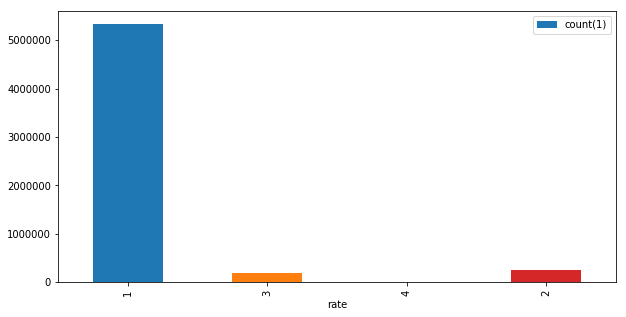

In [36]:
df_result4.createOrReplaceTempView("rate_list4")
spark.sql("""
select rate, count(1)
from
rate_list4
group by rate
""").toPandas().plot(kind="bar", x="rate", y="count(1)", figsize=(10,5))
plt.show()

## 4. Modelling

To reproduce the paper, I use the sample data of MovieLen to train the model. The data is clean and formated. After preprocessing of github data, we can replace the sample data by github data.

In [39]:
from pyspark.sql import *
import pyspark.sql.functions as F
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

### 4.1 Splitting

In [40]:
ratings=df_result4
(training, test) = ratings.randomSplit([0.8, 0.2])
print("Training Dataset Count: " + str(training.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4641271
Test Dataset Count: 1160114


In [41]:
training.groupBy(['rate']).count().orderBy("rate").show()

+----+-------+
|rate|  count|
+----+-------+
|   1|4272238|
|   2| 211989|
|   3| 148982|
|   4|   8062|
+----+-------+



In [42]:
test.groupBy(['rate']).count().orderBy("rate").show()

+----+-------+
|rate|  count|
+----+-------+
|   1|1067625|
|   2|  53170|
|   3|  37340|
|   4|   1979|
+----+-------+



### 4.2 Training and prediction

In [43]:

# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=10, regParam=0.01, userCol="user_id", itemCol="repo_id", ratingCol="rate",
          coldStartStrategy="drop")
model = als.fit(training)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)


### 4.3 Eveluation

In [44]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rate",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
# Generate top 10 user recommendations for each repository 
movieRecs = model.recommendForAllItems(10)

Root-mean-square error = 0.39872407492158707


In [53]:
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rate",
                                predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

# Generate top 10 movie recommendations for each user
userRecs = model.recommendForAllUsers(10)
# Generate top 10 user recommendations for each movie
repoRecs = model.recommendForAllItems(10)

Root-mean-square error = 0.39872407492158707


In [129]:
predictions.show(10)

+-------+-------+----+----------+
|user_id|repo_id|rate|prediction|
+-------+-------+----+----------+
|5421486|1231710|   1|0.12103822|
|3792652|1231710|   3| 1.0169585|
|3152364|1231710|   1|0.38868317|
|3135495|1231710|   1|0.17406435|
|3913984|1231710|   3|0.79880774|
|3570666|3837696|   3| 1.4067433|
|4281865|3837696|   3|0.91240156|
|4522823|3837696|   2|0.68233126|
|7018843|3837696|   2| 1.2757554|
|6064102|3837696|   1| 0.5678805|
+-------+-------+----+----------+
only showing top 10 rows



In [132]:
movieRecs.show(10)

+-------+--------------------+
|repo_id|     recommendations|
+-------+--------------------+
|1231710|[[1104723, 6.2099...|
|3837696|[[8132786, 8.3066...|
|4189105|[[3822112, 3.8015...|
|5967893|[[1914405, 4.7893...|
|6116266|[[1624020, 5.7906...|
|6632698|[[8378708, 10.636...|
|7079500|[[6225013, 5.5033...|
|7533238|[[4879030, 5.5826...|
|7611307|[[5716644, 7.5900...|
|8003417|[[5668813, 6.2299...|
+-------+--------------------+
only showing top 10 rows



In [130]:
userRecs.show(10)

+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|   8592|[[110691676, 5.53...|
|  10817|[[48311711, 3.820...|
|  28088|[[26092173, 3.869...|
|  29194|[[171046539, 3.76...|
|  43302|[[101424202, 3.62...|
|  44358|[[127570975, 3.81...|
|  53691|[[52882030, 3.806...|
|  57039|[[52882030, 3.690...|
|  67376|[[26092173, 3.970...|
|  70097|[[48311711, 3.778...|
+-------+--------------------+
only showing top 10 rows



### 4.4 Hyper parameter tuning

To further improve root mean square error of our model, we need to do grid search for hyper parameter tuning. There are three parameters to tune: rank, max interation and regularization parameters. 

In [48]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [63]:
training.cache()

DataFrame[user_id: int, repo_id: bigint, rate: int]

In [62]:
training2=training.head()

In [66]:
# We now treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
# This will allow us to jointly choose parameters for all Pipeline stages.
# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# We use a ParamGridBuilder to construct a grid of parameters to search over.
# With 3 values for hashingTF.numFeatures and 2 values for lr.regParam,
# this grid will have 3 x 2 = 6 parameter settings for CrossValidator to choose from.
paramGrid = ParamGridBuilder() \
    .addGrid(als.regParam, [0.1,0.01]) \
    .build()

crossval = CrossValidator(estimator=als,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=2)  # use 3+ folds in practice

# Run cross-validation, and choose the best set of parameters.
cvModel = crossval.fit(training)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = cvModel.transform(test)
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.39872407492158707


In [72]:
# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
result=[]
for reg in [0.0005,0.01,0.05,0.1,0.5,1]:
    print(reg)
    als = ALS(maxIter=10, regParam=reg, userCol="user_id", itemCol="repo_id", ratingCol="rate",
              coldStartStrategy="drop")
    model = als.fit(training)

    # Evaluate the model by computing the RMSE on the test data
    predictions = model.transform(validate)
    evaluator = RegressionEvaluator(metricName="rmse", labelCol="rate",
                                    predictionCol="prediction")
    rmse = evaluator.evaluate(predictions)
    result.append([reg,rmse])
    print([reg,rmse])

0.0005
[0.0005, 1.1939378848150353]
0.01
[0.01, 0.39872407492158707]
0.05
[0.05, 0.31722828461373404]
0.1
[0.1, 0.3179798268479986]
0.5
[0.5, 0.5791195622550463]
1
[1, 1.1237612560442087]


In [131]:
pd.DataFrame(result,columns=["reg","rmse"])

,reg,rmse
0,0.0005,1.193938
1,0.0100,0.398724
2,0.0500,0.317228
3,0.1000,0.317980
4,0.5000,0.579120
5,1.0000,1.123761


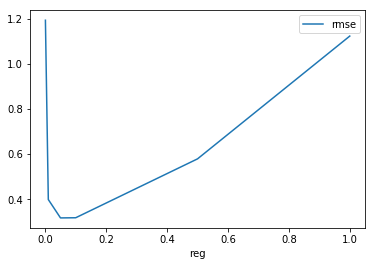

In [84]:
import pandas as pd
pd.DataFrame(result,columns=["reg","rmse"]).plot(x="reg",y="rmse")

# 5. Summary

In this work, I developed a repository  recommender system using Apache Spark and its ALS algorithm. The data is collected from GitHub API and a series of data preprocessing is implemented to convert the behaviors of users to repos into ratings, which can be applied in recommendation engine. In addition, preselection make sure the model aviod the problem of cold start. RMSE is used as evaluation matrix and hyperparameter tuning is implemented to improve the performance. The results showed a decent root mean square error (0.3173) as an output of the recommender model.
Further study is also required to improve the model. For example, we can tune the hyperparameter of ranks to get the optimum perameter[5]. Also, we may consider how to recommende the repository to the new users who have little historic data. 


Further study is also required to improve the model. For example, we can tune the hyperparameter of ranks to get the optimum perameter. Also, we may consider how to recommende the repository to the new users who have little historic data. 